In [1]:
#Loading libraries
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
#Exploratory Data Analysis
df = pd.read_csv('data/USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
print(df.shape)
df.head()

(50, 5)


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


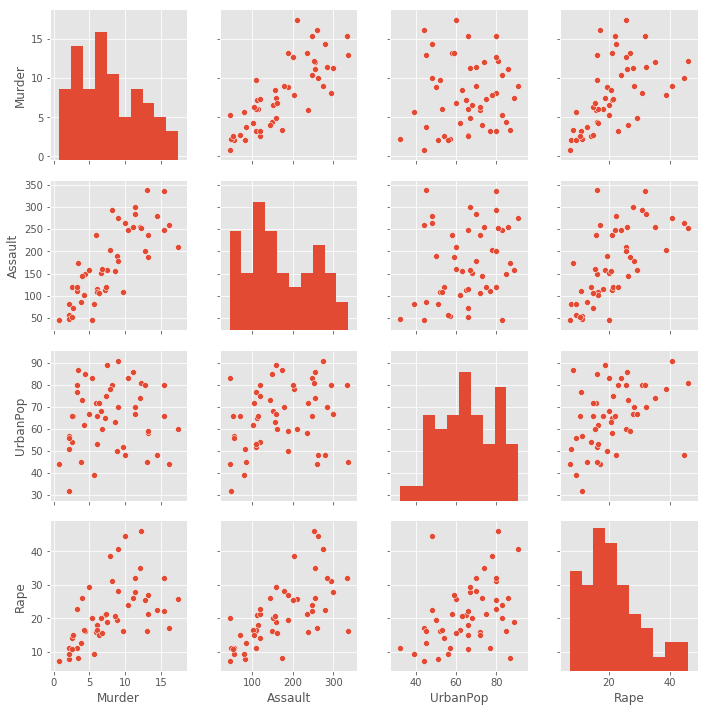

In [4]:
sns.pairplot(df)

In [5]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df.iloc[:,1:])

In [6]:
#Principal Component Analysis
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

In [7]:
print("The 1st principal component is:", pca.components_[0])
print("The 2nd principal component is:", pca.components_[1])

The 1st principal component is: [0.53589947 0.58318363 0.27819087 0.54343209]
The 2nd principal component is: [ 0.41818087  0.1879856  -0.87280619 -0.16731864]


In [8]:
print("The 1st principal component explains", pca.explained_variance_ratio_[0], "of the variance.")
print("The 2nd principal component explains", pca.explained_variance_ratio_[1], "of the variance.")
print("Together they explain", pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1], "of the variance.")

The 1st principal component explains 0.6200603947873736 of the variance.
The 2nd principal component explains 0.2474412881349602 of the variance.
Together they explain 0.8675016829223339 of the variance.


In [9]:
#Hierarchical clustering
Z = linkage(X_scaled, 'ward')
c, cdoph_dists = cophenet(Z, pdist(X_scaled))

In [10]:
#cophenetic correlation coefficient
c

0.6975265632370389

In [11]:
#cophenetic distance matrix
cdoph_dists

array([ 6.52747083,  6.52747083, 13.6534666 , ...,  3.02367873,
        7.26116776,  7.26116776])

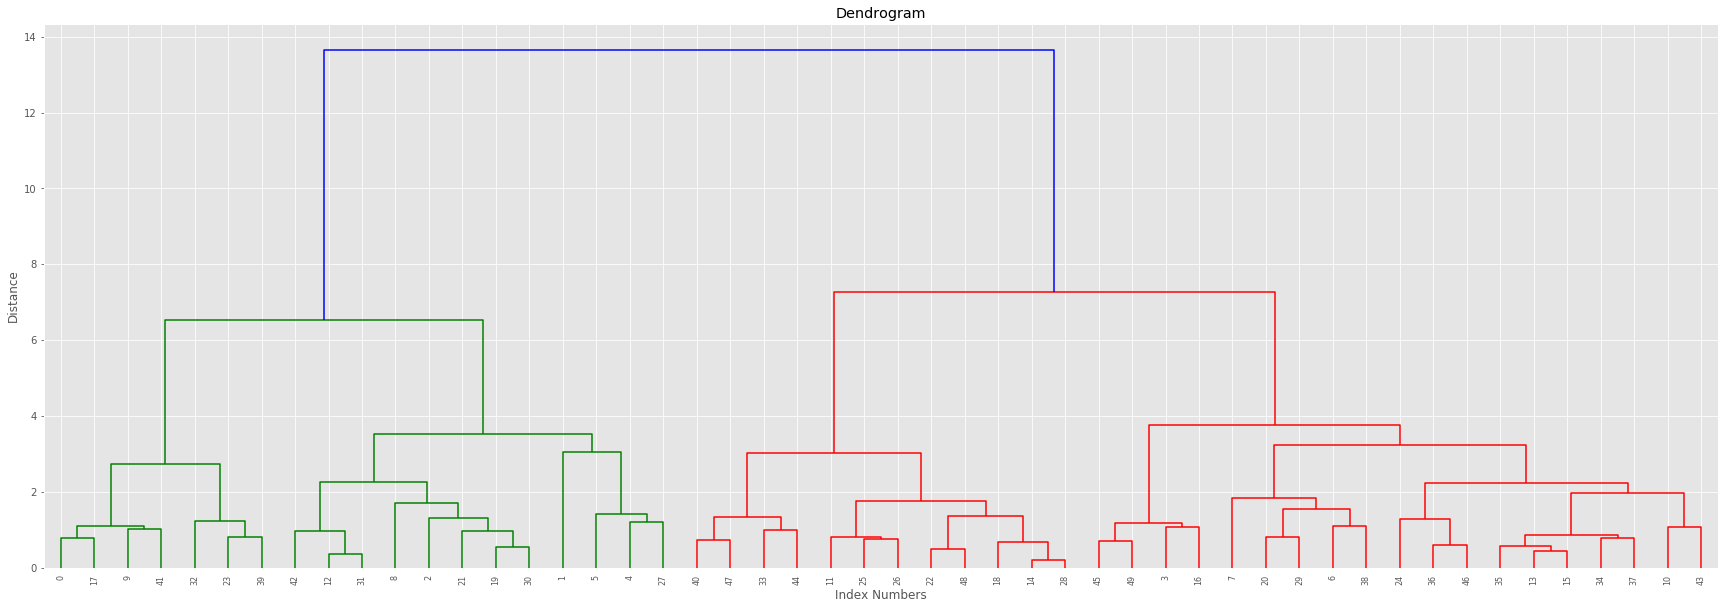

In [12]:
#Dendrogram
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

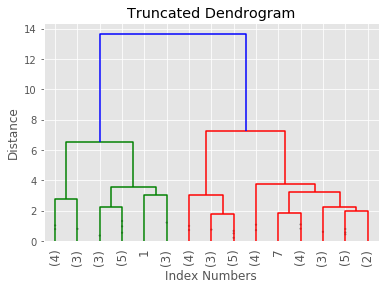

In [13]:
plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [14]:
#Hierarchical clustering on two principal component
Z = linkage(df_pca, 'ward')
c, cdoph_dists = cophenet(Z, pdist(df_pca))
c

0.7190081239032912

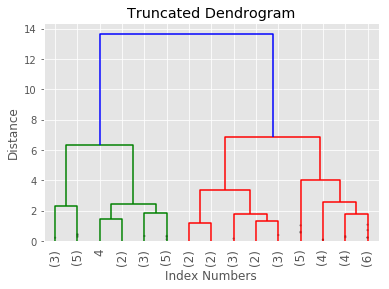

In [15]:
plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [16]:
#Varying the threshold
X_ = []
Y_ = []
for i in range(1,11,1):
    max_d = i
    clusters = fcluster(Z, max_d, criterion='distance')
    X_.append(i)
    Y_.append(len(set(clusters)))

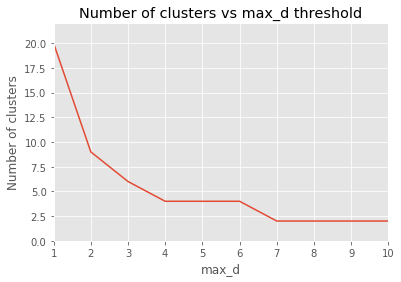

In [17]:
plt.plot(X_,Y_)
plt.title("Number of clusters vs max_d threshold")
plt.xlabel("max_d")
plt.ylabel("Number of clusters")
plt.ylim(0, 22)
plt.xlim(1, 10)
plt.show()

{1, 2, 3, 4, 5, 6, 7, 8, 9}


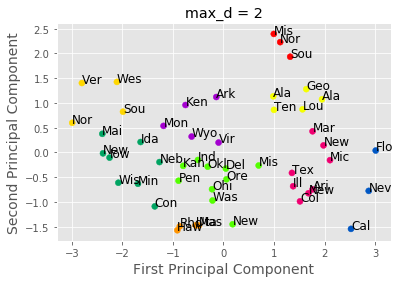

{1, 2, 3, 4}


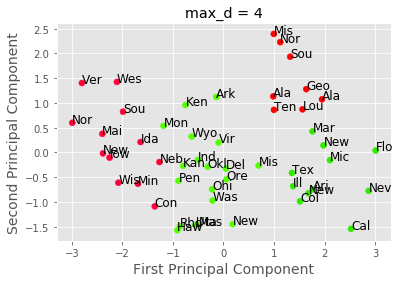

{1, 2, 3, 4}


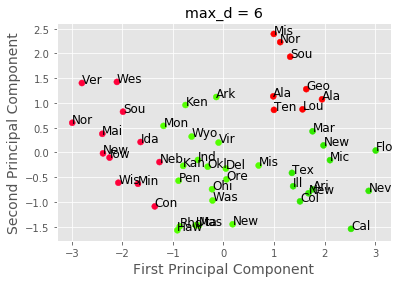

{1, 2}


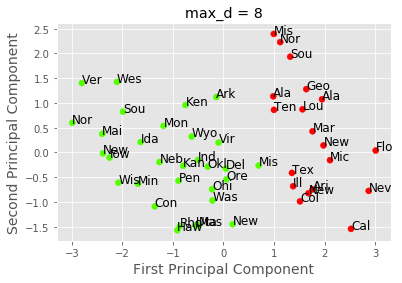

{1, 2}


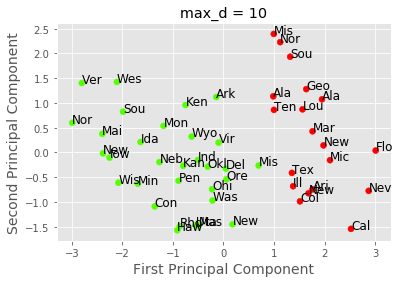

In [19]:
#Visualizing clusters
for i in range(2,12,2):
    max_d = i
    clusters = fcluster(Z, max_d, criterion='distance')
    print(set(clusters))
    plt.scatter(df_pca[:,0], df_pca[:,1], c=clusters, cmap='prism')
    plt.title("max_d = "+str(i))
    for i, x_i in enumerate(df['States']):
        plt.annotate(x_i[:3], (df_pca[i,0], df_pca[i,1]), fontsize=12)
    plt.xlabel('First Principal Component',fontsize=14)
    plt.ylabel('Second Principal Component',fontsize=14)
    plt.show()